In [1]:
# Install and load packages ---------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg
%matplotlib inline

In [2]:
# Load an example dataset ---------------

url = "https://github.com/worldbank/r-econ-visual-library/raw/master/Library/Data/BarPlotsTwoVariables.dta"

data = pd.read_stata(url)
data


,study,case,type,treat_correct
0,China,Tuberculosis (AFB or CXR),Standardized Patient,0.322097
1,China,Tuberculosis (AFB or CXR),Vignette,0.764045
2,Delhi,Tuberculosis (AFB or CXR),Standardized Patient,0.130435
3,Delhi,Tuberculosis (AFB or CXR),Vignette,0.724638
4,Bihar,Diarrhea (ORS),Vignette,0.785000
5,Bihar,Diarrhea (ORS),Standardized Patient,0.208000


In [3]:
# Construct an interaction ---------------

data['sc'] = data.study.astype(str).str.cat(data[['case']].astype(str), sep = '.')
data


,study,case,type,treat_correct,sc
0,China,Tuberculosis (AFB or CXR),Standardized Patient,0.322097,China.Tuberculosis (AFB or CXR)
1,China,Tuberculosis (AFB or CXR),Vignette,0.764045,China.Tuberculosis (AFB or CXR)
2,Delhi,Tuberculosis (AFB or CXR),Standardized Patient,0.130435,Delhi.Tuberculosis (AFB or CXR)
3,Delhi,Tuberculosis (AFB or CXR),Vignette,0.724638,Delhi.Tuberculosis (AFB or CXR)
4,Bihar,Diarrhea (ORS),Vignette,0.785000,Bihar.Diarrhea (ORS)
5,Bihar,Diarrhea (ORS),Standardized Patient,0.208000,Bihar.Diarrhea (ORS)


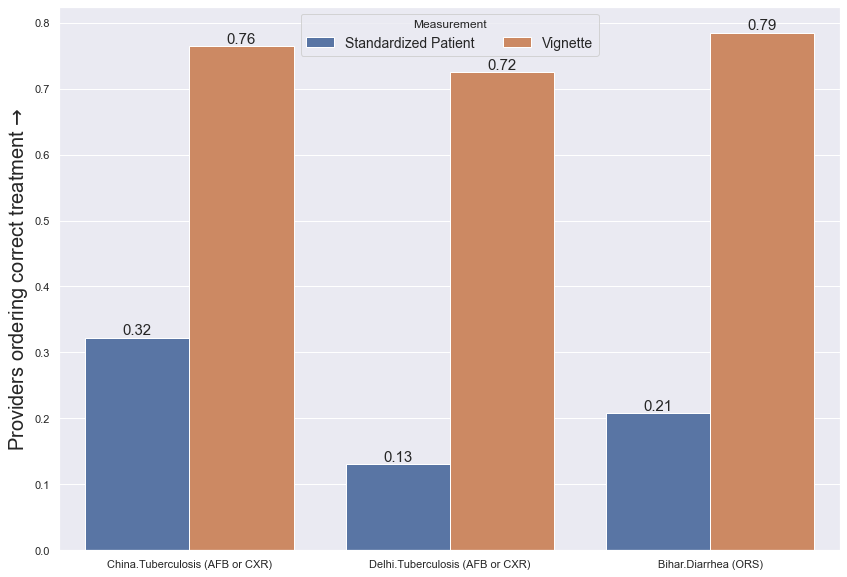

In [63]:
# Plot ---------------

plt.figure(figsize=(14,10))

ax = sns.barplot(data=data, x = 'sc', y = 'treat_correct', hue = 'type')

plt.ylabel('Providers ordering correct treatment $→$', fontsize=20)
plt.xlabel('', fontsize=20)

plt.bar_label(ax.containers[0], fmt='%.2f', fontsize = 15)
plt.bar_label(ax.containers[1], fmt='%.2f', fontsize = 15)

plt.legend(title = 'Measurement', loc="upper center", ncol = len(ax.lines), fontsize=14)
plt.show()
